# Linear Regression Tutorial
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1. Overview the dataset

Then meaning of some selected variables.

* id: a notation for a house 
* date: the date house was sold 
* price: price of the house
* bedrooms: number of bedrooms
* bathrooms: number of bathrooms/bedrooms
* sqftliving: square footage of the home
* zipcode: zip code
* condition: how good the condition is overall. 1 indicates worn out property and 5 excellent.

In [2]:
dataset = pd.read_csv("kc_house_data.csv")

In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Question 1.1.** How many covariate variables (id and date are not covariate variables)? How many samples?

In [4]:
cov_var = len(dataset.columns)-2
print('There are',cov_var,'covariant variables.')

There are 19 covariant variables.


**Question 1.2.** Select several variables, 'bedrooms', 'bathrooms', 'sqft_living','zipcode','condition', create a new dataframe `house` include those variables and price column, where the price column is in thousands, i.e. price = price/1000

In [5]:
data = {'price':dataset.price.to_numpy()/1000, 'bedrooms':dataset.bedrooms, 
        'bathrooms':dataset.bathrooms,'sqft_living':dataset.sqft_living, 
        'zipcode':dataset.zipcode,'condition':dataset.condition}
house = pd.DataFrame(data)
house.head()

,price,bedrooms,bathrooms,sqft_living,zipcode,condition
0,221.9,3,1.00,1180,98178,3
1,538.0,3,2.25,2570,98125,3
2,180.0,2,1.00,770,98028,3
3,604.0,4,3.00,1960,98136,5
4,510.0,3,2.00,1680,98074,3


**Question 1.3.** What kind of variables are they?  Quantitative data (discrete or continuous) or qualitative data (ordinal or nominal)? 

#### Types of variables:
* **price:** quantitative, continuous
* **bedrooms:** quantitative, discrete
* **bathrooms:** quantitative, discrete
* **sqft_living:** quantitative, continuous
* **zipcode:** qualitative, nominal
* **condition:** qualitative, ordinal

**Question 1.4.** If the variable is qualitative data, how many levels does this variable has?

Condition is an example of a qualitative dataset and it has 5 levels (1, 2, 3, 4, 5)

**Question 1.5.** Covariance matrix and pair plot

In [6]:
# I was unsure on what variables you wanted in the pariplot so I used them all
house.corr()

,price,bedrooms,bathrooms,sqft_living,zipcode,condition
price,1.000000,0.308350,0.525138,0.702035,-0.053203,0.036362
bedrooms,0.308350,1.000000,0.515884,0.576671,-0.152668,0.028472
bathrooms,0.525138,0.515884,1.000000,0.754665,-0.203866,-0.124982
sqft_living,0.702035,0.576671,0.754665,1.000000,-0.199430,-0.058753
zipcode,-0.053203,-0.152668,-0.203866,-0.199430,1.000000,0.003026
condition,0.036362,0.028472,-0.124982,-0.058753,0.003026,1.000000


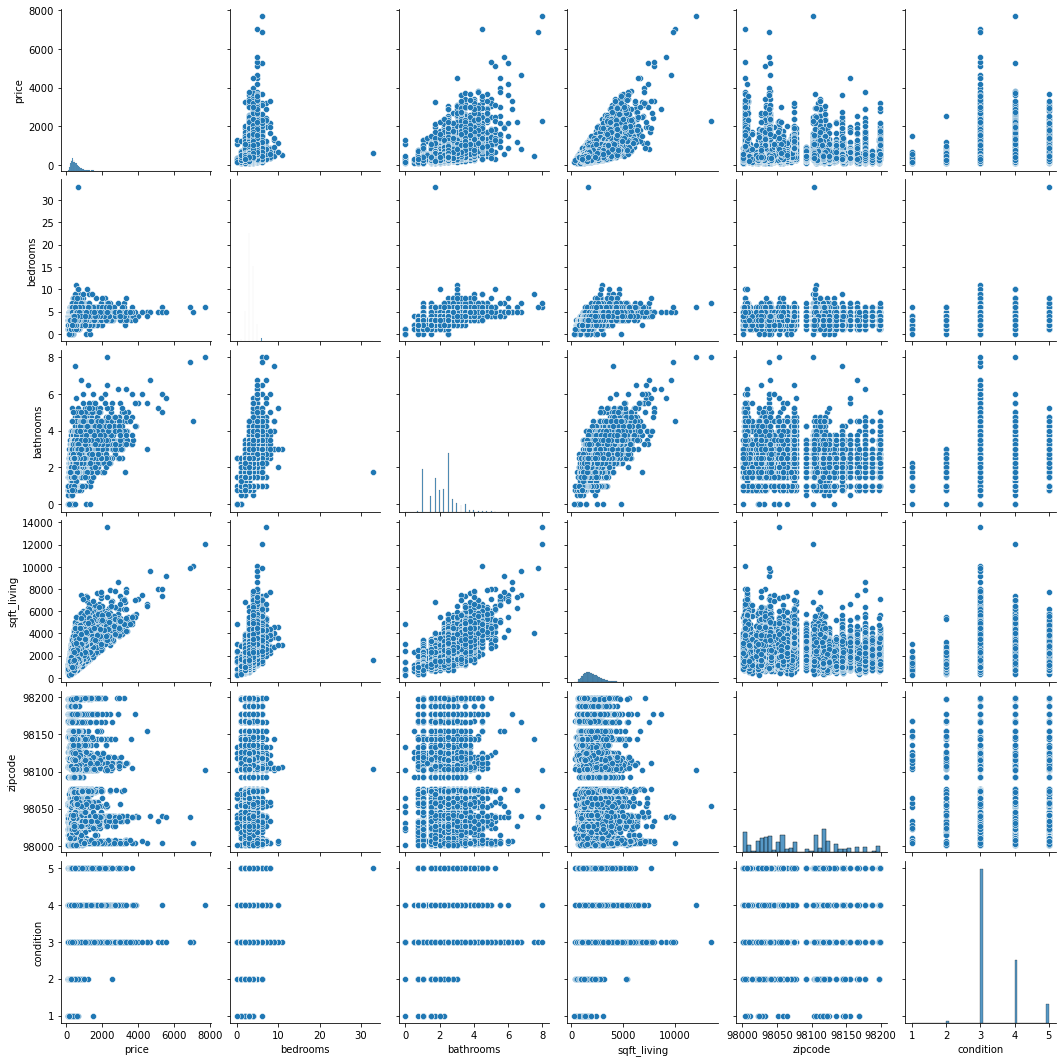

In [7]:
# I was unsure on what variables you wanted in the pariplot so I used them all
sns.pairplot(house);

# 2. Simple Linear Regression

Consider the simple linear regression problem house `price(k)` regressed on living area size.

**Question 2.1.** Use ols method to create the linear regression model

In [8]:
model = smf.ols('price ~ sqft_living', house).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-43.5807,4.403,-9.899,0.000,-52.210,-34.951
sqft_living,0.2806,0.002,144.920,0.000,0.277,0.284


**Question 2.2.** Write down the regression model.

$$\text{Price} = -43.5807 + 0.2806*\text{sqft_living}$$

**Question 2.3.** Use `LinearRegression` to obtain the linear regression model.

In [9]:
import sklearn.linear_model as skl_lm
lr_model = skl_lm.LinearRegression()
X = house[['sqft_living']]
y = house['price']
lr_model.fit(X,y)

print('Intecept of',round(lr_model.intercept_,5))
print('Slope of',round(lr_model.coef_[0],5))

Intecept of -43.58074
Slope of 0.28062


# 3. Multiple regression model

**Question 3.1.** Regress the `price` on `bedrooms`, `bathrooms`, and `sqft_living` and write down the regression model below.

In [10]:
multi_ols_model = smf.ols('price ~ sqft_living + bedrooms + bathrooms', house).fit()
multi_ols_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,74.8471,6.914,10.826,0.000,61.296,88.398
sqft_living,0.3094,0.003,100.231,0.000,0.303,0.315
bedrooms,-57.8609,2.335,-24.784,0.000,-62.437,-53.285
bathrooms,7.9327,3.511,2.260,0.024,1.052,14.814


**Question 3.2.(optional)** Which variable(s) is significant, which one is not? Why some variable(s) are not significant？ Write your guess.

The **Sqft_living**, and **bedroom** variables **are significant** as they have a very small p-value (of nearly zero), the only **insignificant variable** is that of **bathrooms**, it's p-value is 0.024, which is larger than 0.005.

# 4. Regress on zip code

**Question 4.1.** Revise your answer of **Question 1.3.**. The zipcode is a nominal variable whose values are represented by numbers. In this section, we want to divide the county into two parts based on zipcode. Create a new column named `area`. If the `zipcode` is no more than 98100, its area = 0; If the `zipcode` is larger than 98100, we let area = 1.  

In [11]:
house = pd.DataFrame(data)

house['area'] = house.zipcode.apply(lambda x :1 if x > 98100 else 0).to_numpy()

In [12]:
house.head()

,price,bedrooms,bathrooms,sqft_living,zipcode,condition,area
0,221.9,3,1.00,1180,98178,3,1
1,538.0,3,2.25,2570,98125,3,1
2,180.0,2,1.00,770,98028,3,0
3,604.0,4,3.00,1960,98136,5,1
4,510.0,3,2.00,1680,98074,3,0


**Question 4.2.** Regression `price` on area.

In [13]:
model = smf.ols('price ~ area', house).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,543.7287,3.266,166.491,0.000,537.327,550.130
area,-8.7649,5.067,-1.730,0.084,-18.697,1.168


**Question 4.3.** We want to refine the area, so we divide the county into four parts based on zipcode. Create a new column named `area2`. 
* area2 = 0 if zipcode <= 98050; 
* area2 = 1 if 98050 < zipcode <=98100; 
* area2 = 2 if 98100 < zipcode <=98150; 
* area2 = 3 if zipcode > 98100.

#### ^ I think it meant to state that area2 = 3 if zipcode > 98150. 

In [14]:
area2 = []
for i in range(len(house)):
    if house.zipcode[i] <= 98050:
        area2.append(0)
    if 98050 < house.zipcode[i] & house.zipcode[i] <= 98100:
        area2.append(1)
    if 98100 < house.zipcode[i] & house.zipcode[i] <= 98150:
        area2.append(2)
        
# I went ahead and changed 98100 to 98150 as the code would not work otherwise
    if house.zipcode[i] > 98150: 
        area2.append(3)
        
area2 = np.array(area2)

In [15]:
house['area2'] = area2

In [16]:
house.head()

,price,bedrooms,bathrooms,sqft_living,zipcode,condition,area,area2
0,221.9,3,1.00,1180,98178,3,1,3
1,538.0,3,2.25,2570,98125,3,1,2
2,180.0,2,1.00,770,98028,3,0,0
3,604.0,4,3.00,1960,98136,5,1,2
4,510.0,3,2.00,1680,98074,3,0,1


**Question 4.3.** Regress `price` on `area2`.

In [17]:
model = smf.ols('price ~ area2', house).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,554.1200,3.725,148.748,0.000,546.818,561.422
area2,-12.2292,2.410,-5.074,0.000,-16.953,-7.505
